This code displays a plot of the ion velocity from the Omni and Artemis data before filtering out invalid values. This data is not usable in its current state. 2019-08-01T00:08:17.788Z 2019-08-31T23:58:45.303Z

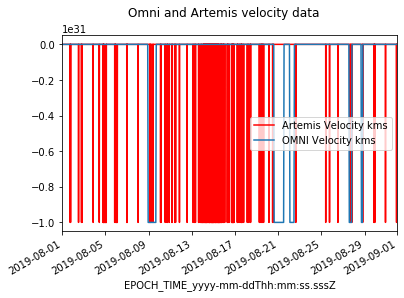

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Omni and Artemis velocity data")
om = pd.read_csv("OnmiForArtemis.csv")
ar = pd.read_csv("ArtemisSolarWind.csv")
ar['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(ar['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])
om['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(om['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])
om = om.drop(['HELIOGRAPHIC_LATITUDE_deg', 'HELIOGRAPHIC_LONGITUDE_deg', 'ION_DENSITY_N_cm3'], axis=1)
om = om.loc[:, ~om.columns.str.contains('^Unnamed')]
ar = ar.drop(['Ion_Density_n_cc'], axis=1)
ar.rename(columns={'Ion_Velocity_km_s':'Artemis Velocity kms'}, inplace=True)
om.rename(columns={'BULK_FLOW_SPEED_km_s':'OMNI Velocity kms'}, inplace=True)
ar.head()
ax = plt.gca()
ar.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='Artemis Velocity kms', color='red', ax=ax)
om.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI Velocity kms', ax=ax)
ax.set_xlim([datetime.date(2019, 8, 1), datetime.date(2019, 9, 1)])
plt.show()

Here is the data after filtering out the invalid values. As you can see this data looks much more meaningful, but there are still some inconsistencies with the Artemis data.

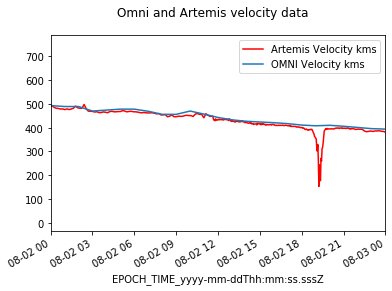

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

fig = plt.figure()
fig.suptitle("Omni and Artemis velocity data")
om = pd.read_csv("OnmiForArtemis.csv")
ar = pd.read_csv("ArtemisSolarWind.csv")
ar['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(ar['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])
om['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(om['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])
om = om[om.ION_DENSITY_N_cm3 != -1.0E+31]
om = om.drop(['HELIOGRAPHIC_LATITUDE_deg', 'HELIOGRAPHIC_LONGITUDE_deg', 'ION_DENSITY_N_cm3'], axis=1)
om = om.loc[:, ~om.columns.str.contains('^Unnamed')]
ar = ar[ar.Ion_Density_n_cc != -1.0E+31]
ar = ar.drop(['Ion_Density_n_cc'], axis=1)
ar.rename(columns={'Ion_Velocity_km_s':'Artemis Velocity kms'}, inplace=True)
om.rename(columns={'BULK_FLOW_SPEED_km_s':'OMNI Velocity kms'}, inplace=True)
ar.head()
ax = plt.gca()
ar.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='Artemis Velocity kms', color='red', ax=ax)
om.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI Velocity kms', ax=ax)
ax.set_xlim([datetime.date(2019, 8, 2), datetime.date(2019, 8, 3)])
plt.show()

Here is the code and plot for resampling the Artemis data based on hourly averages. This means that the individual data points can be matched up with the data points from the OMNI dataset.

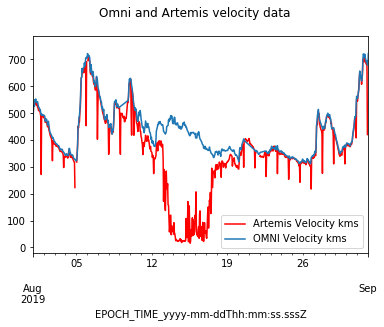

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Omni and Artemis velocity data")
om = pd.read_csv("OnmiForArtemis.csv")
ar = pd.read_csv("ArtemisSolarWind.csv")
ar['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(ar['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])
om['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(om['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])
om = om[om.ION_DENSITY_N_cm3 != -1.0E+31]
om = om.drop(['HELIOGRAPHIC_LATITUDE_deg', 'HELIOGRAPHIC_LONGITUDE_deg', 'ION_DENSITY_N_cm3'], axis=1)
om = om.loc[:, ~om.columns.str.contains('^Unnamed')]
ar = ar[ar.Ion_Density_n_cc != -1.0E+31]
ar = ar.drop(['Ion_Density_n_cc'], axis=1)
ar.rename(columns={'Ion_Velocity_km_s':'Artemis Velocity kms'}, inplace=True)
om.rename(columns={'BULK_FLOW_SPEED_km_s':'OMNI Velocity kms'}, inplace=True)
ar = ar.resample('H', on = 'EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ').mean().reset_index()
ax = plt.gca()
ar.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='Artemis Velocity kms', color='red', ax=ax)
om.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI Velocity kms', ax=ax)
ax.set_xlim([datetime.date(2019, 8, 1), datetime.date(2019, 9, 1)])
plt.show()

This data does not match up exactly, but it's possible that the position of the satelite in comparison to Artemis could explain some of these inconsistencies. Here is a narrow slice of the data, which should help validate our naive approach for the time shift.

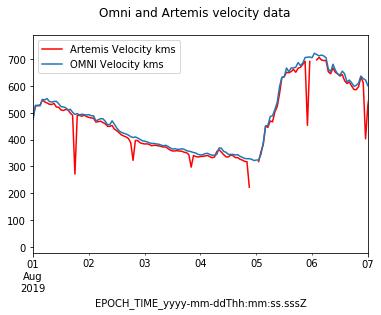

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Omni and Artemis velocity data")
om = pd.read_csv("OnmiForArtemis.csv")
ar = pd.read_csv("ArtemisSolarWind.csv")
ar['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(ar['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])
om['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(om['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])
om = om[om.ION_DENSITY_N_cm3 != -1.0E+31]
om = om.drop(['HELIOGRAPHIC_LATITUDE_deg', 'HELIOGRAPHIC_LONGITUDE_deg', 'ION_DENSITY_N_cm3'], axis=1)
om = om.loc[:, ~om.columns.str.contains('^Unnamed')]
ar = ar[ar.Ion_Density_n_cc != -1.0E+31]
ar = ar.drop(['Ion_Density_n_cc'], axis=1)
ar.rename(columns={'Ion_Velocity_km_s':'Artemis Velocity kms'}, inplace=True)
om.rename(columns={'BULK_FLOW_SPEED_km_s':'OMNI Velocity kms'}, inplace=True)
ar = ar.resample('H', on = 'EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ').mean().reset_index()
ax = plt.gca()
ar.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='Artemis Velocity kms', color='red', ax=ax)
om.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI Velocity kms', ax=ax)
ax.set_xlim([datetime.date(2019, 8, 1), datetime.date(2019, 8, 7)])
plt.show()

There are still some inconsistencies with the data, but the majority of these are occuring at a rate of 1 per day. This could be indicitive of the moon passing behind the Earth and being shielded from the solar wind somewhat.

Here are some plots generated from the data from Maven from 08/01/2015 to 09/01/2015. This data does not look as good, which may be because the velocity had to be recomposed from 3 seperate vectors. We also attempted to use the quality data provided for the Maven velocity components, but the result was the same.

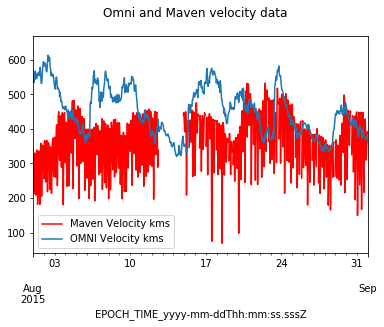

Maven Velocity kms
count          675.000000
mean           369.738810
std             77.787932
min             69.421562
25%            325.526751
50%            380.935006
75%            427.412726
max            532.695921

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

fig = plt.figure()
fig.suptitle("Omni and Maven velocity data")
om = pd.read_csv("OmniForMaven.csv")
ma = pd.read_csv("MavenVelocityWithQuality.csv")

om['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(om['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])
om = om[om.ION_DENSITY_N_CC != -1.0E+31]
om = om.drop(['HELIOGRAPHIC_LATITUDE_deg', 'HELIOGRAPHIC_LONGITUDE_deg', 'ION_DENSITY_N_CC'], axis=1)
om = om.loc[:, ~om.columns.str.contains('^Unnamed')]

ma['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(ma['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'])
ma = ma[ma.Xquality == 1]
ma = ma[ma.Xquality != -1.0E+31]
ma['BULK_FLOW_VELOCITY_km_s'] = np.linalg.norm(ma[['Xvelocity','Yvelocity','Zvelocity']].values,axis=1)
ma = ma[ma.BULK_FLOW_VELOCITY_km_s < 800]
ma = ma.drop(['Xvelocity', 'Yvelocity', 'Zvelocity', 'Xquality', 'Yquality', 'Zquality'], axis=1)
ma = ma.resample('H', on = 'EPOCH__yyyy-mm-ddThh:mm:ss.sssZ').mean().reset_index()

ma.rename(columns={'BULK_FLOW_VELOCITY_km_s':'Maven Velocity kms'}, inplace=True)
om.rename(columns={'BULK_FLOW_SPEED_km_s':'OMNI Velocity kms'}, inplace=True)

ax = plt.gca()
ma.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='Maven Velocity kms', color='red', ax=ax)
om.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI Velocity kms', ax=ax)
ax.set_xlim([datetime.date(2015, 8, 1), datetime.date(2015, 9, 1)])
plt.show()
ma.describe()

<Figure size 432x288 with 0 Axes>

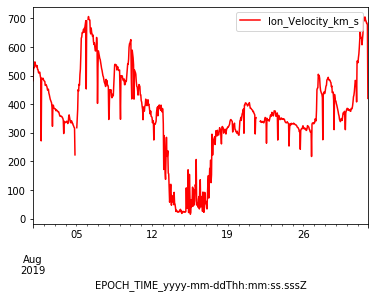

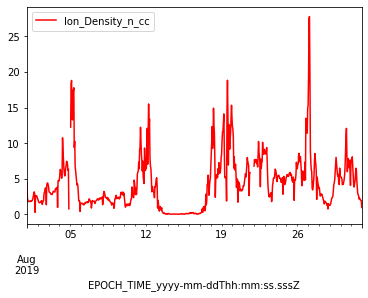

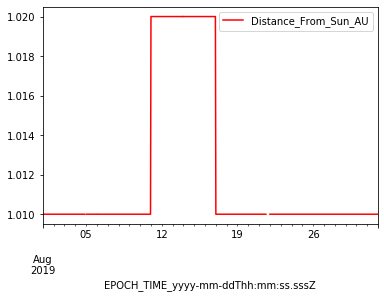

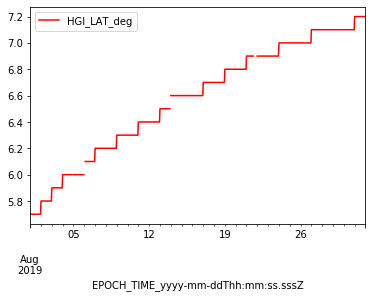

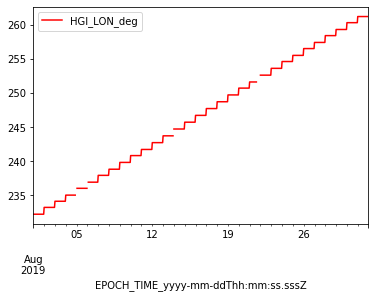

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Artemis Merged data")
ar = pd.read_csv("ArtemisMerged.csv")
ar['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(ar['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])
ar = ar[ar.Ion_Density_n_cc != -1.0E+31]
ar = ar.resample('H', on = 'EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ').mean().reset_index()
ar.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='Ion_Velocity_km_s', color='red')
ar.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='Ion_Density_n_cc', color='red')
ar.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='Distance_From_Sun_AU', color='red')
ar.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='HGI_LAT_deg', color='red')
ar.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='HGI_LON_deg', color='red')
plt.show()